In [1]:
paciente='paciente4'

In [2]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [5]:
with open('dataset/generado/'+paciente+'/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

49606

In [7]:
with open('dataset/generado/'+paciente+'/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

49606

In [9]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

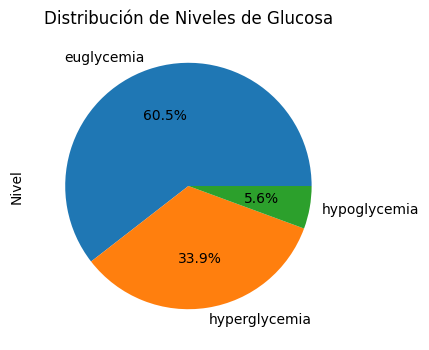

In [10]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [11]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       30013
hyperglycemia    16811
hypoglycemia      2782
Name: Nivel, dtype: int64

In [12]:
df_Y_scaled

,Glucose level,Nivel
0,113.0,euglycemia
1,123.0,euglycemia
2,130.0,euglycemia
3,131.0,euglycemia
4,132.0,euglycemia
...,...,...
49601,68.0,hypoglycemia
49602,62.0,hypoglycemia
49603,56.0,hypoglycemia
49604,54.0,hypoglycemia


## Paso 1

In [13]:
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [14]:
print(len(XP[2]))

9921


In [15]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

In [16]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [17]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 7506
Program finished in 1.5956082999909995 seconds - using multiprocessing
1 14954
Program finished in 1.542139999990468 seconds - using multiprocessing
2 22336
Program finished in 1.7248708000115585 seconds - using multiprocessing
3 29745
Program finished in 1.673611099991831 seconds - using multiprocessing
4 37068
Program finished in 1.7107755999895744 seconds - using multiprocessing


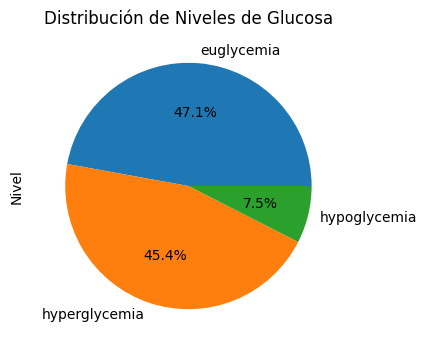

In [18]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [19]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       17475
hyperglycemia    16811
hypoglycemia      2782
Name: Nivel, dtype: int64

<AxesSubplot: >

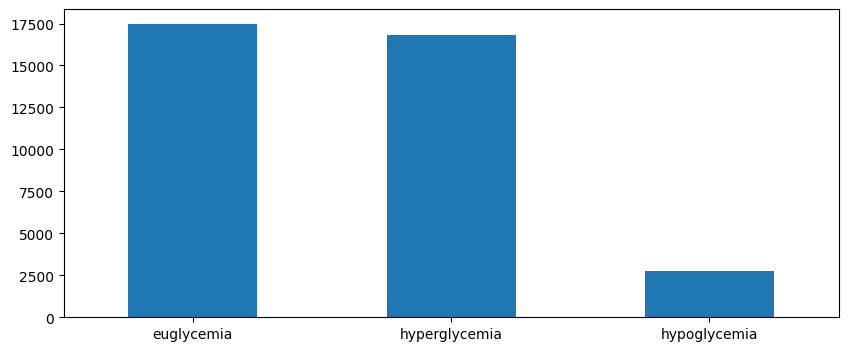

In [20]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [21]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [22]:
len(XNew)

37068

In [23]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [24]:
len(YNew)

37068

## Paso 2

In [25]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

7414


In [26]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 6009
Program finished in 0.49335279999650083 seconds - using multiprocessing
1 11924
Program finished in 0.501174600009108 seconds - using multiprocessing
2 17797
Program finished in 0.5585587000095984 seconds - using multiprocessing
3 23747
Program finished in 0.625130700005684 seconds - using multiprocessing
4 29602
Program finished in 0.7426048000052106 seconds - using multiprocessing


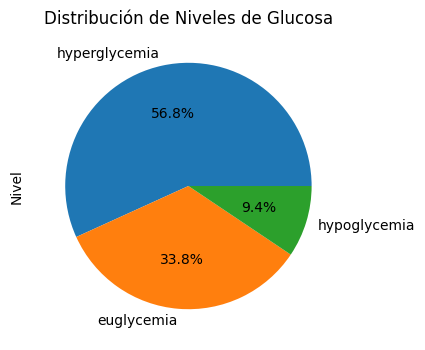

In [27]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [28]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    16811
euglycemia       10009
hypoglycemia      2782
Name: Nivel, dtype: int64

In [29]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

5920


In [30]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 4578
Program finished in 0.5219076999928802 seconds - using multiprocessing
1 9084
Program finished in 0.5013784999900963 seconds - using multiprocessing
2 13567
Program finished in 0.5144096999865724 seconds - using multiprocessing
3 18000
Program finished in 0.5593527999881189 seconds - using multiprocessing
4 22601
Program finished in 0.506812199993874 seconds - using multiprocessing


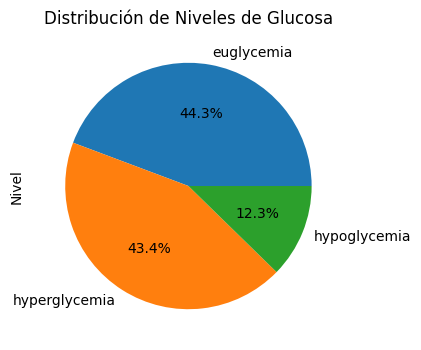

In [31]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [32]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       10009
hyperglycemia     9810
hypoglycemia      2782
Name: Nivel, dtype: int64

In [33]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [34]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 3

In [35]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

4520
0 3689
Program finished in 0.24215770000591874 seconds - using multiprocessing
1 7320
Program finished in 0.2650668999995105 seconds - using multiprocessing
2 10910
Program finished in 0.2914734999940265 seconds - using multiprocessing
3 14521
Program finished in 0.321050299986382 seconds - using multiprocessing
4 18130
Program finished in 0.3282598999940092 seconds - using multiprocessing


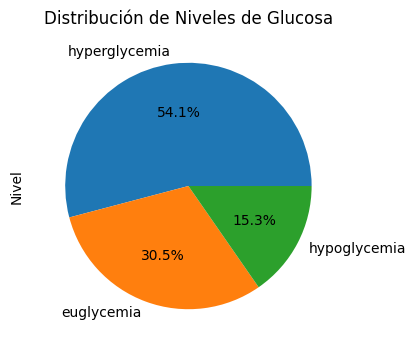

In [36]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [37]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    9810
euglycemia       5538
hypoglycemia     2782
Name: Nivel, dtype: int64

In [38]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

3626
0 2804
Program finished in 0.24502400000346825 seconds - using multiprocessing
1 5607
Program finished in 0.24793419998604804 seconds - using multiprocessing
2 8372
Program finished in 0.255441500004963 seconds - using multiprocessing
3 11131
Program finished in 0.2840839999989839 seconds - using multiprocessing
4 14000
Program finished in 0.27785579999908805 seconds - using multiprocessing


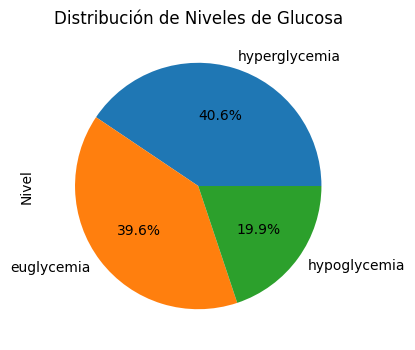

In [39]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [40]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    5680
euglycemia       5538
hypoglycemia     2782
Name: Nivel, dtype: int64

In [41]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [42]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 4

In [43]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

2800
0 2358
Program finished in 0.14445259999774862 seconds - using multiprocessing
1 4649
Program finished in 0.15571490000002086 seconds - using multiprocessing
2 6898
Program finished in 0.18316489999415353 seconds - using multiprocessing
3 9171
Program finished in 0.1771401000005426 seconds - using multiprocessing
4 11462
Program finished in 0.16213369999604765 seconds - using multiprocessing


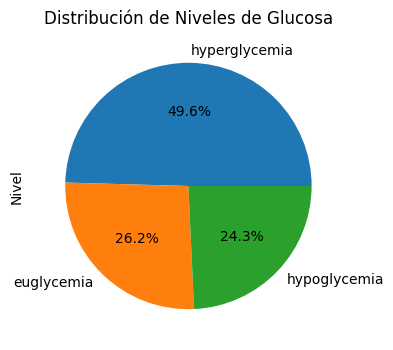

In [44]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [45]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    5680
euglycemia       3000
hypoglycemia     2782
Name: Nivel, dtype: int64

In [46]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

2292
0 1830
Program finished in 0.13520880001306068 seconds - using multiprocessing
1 3632
Program finished in 0.14607339999929536 seconds - using multiprocessing
2 5398
Program finished in 0.14643929999147076 seconds - using multiprocessing
3 7172
Program finished in 0.17362829999183305 seconds - using multiprocessing
4 9026
Program finished in 0.177958000000217 seconds - using multiprocessing


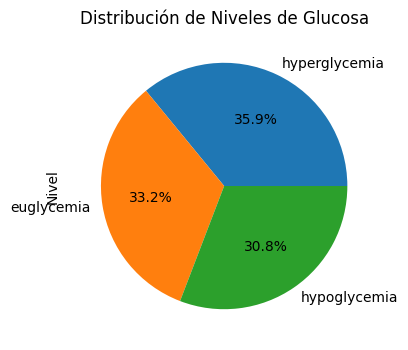

In [47]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [48]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    3244
euglycemia       3000
hypoglycemia     2782
Name: Nivel, dtype: int64

In [49]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [50]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [51]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down4.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [52]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [53]:
len(array_Ytrain)

9026

In [54]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

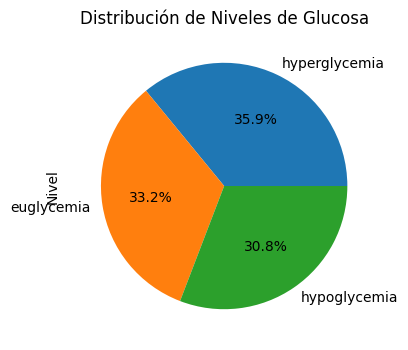

In [55]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [56]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    3244
euglycemia       3000
hypoglycemia     2782
Name: Nivel, dtype: int64

In [57]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [58]:
minClass

2782

In [59]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xtrain,array_Ytrain,array_Ytrain_label,0,'hyperglycemia',False,minClass) 

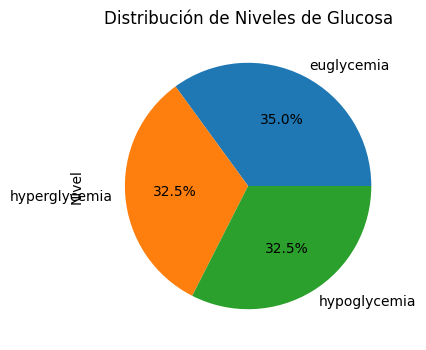

In [60]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [61]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       3000
hyperglycemia    2782
hypoglycemia     2782
Name: Nivel, dtype: int64

In [62]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

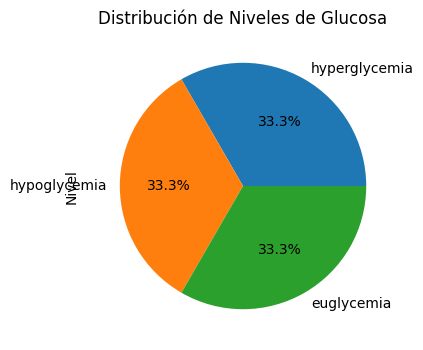

In [63]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [64]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    2782
hypoglycemia     2782
euglycemia       2782
Name: Nivel, dtype: int64

<AxesSubplot: >

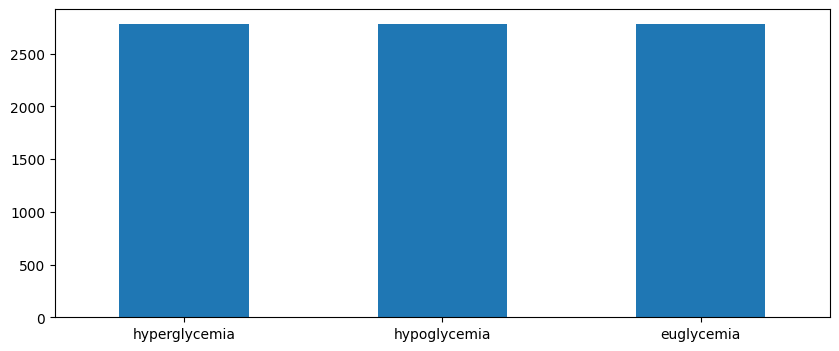

In [65]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [66]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [67]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling on validation dataset

In [68]:
with open('dataset/generado/'+paciente+'/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [69]:
len(array_Xval)

6201

In [70]:
with open('dataset/generado/'+paciente+'/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [71]:
len(array_Yval)

6201

In [72]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

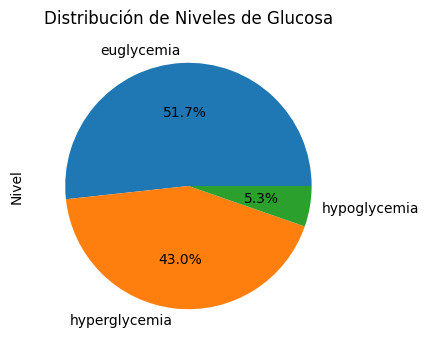

In [73]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [74]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       3207
hyperglycemia    2664
hypoglycemia      330
Name: Nivel, dtype: int64

<AxesSubplot: >

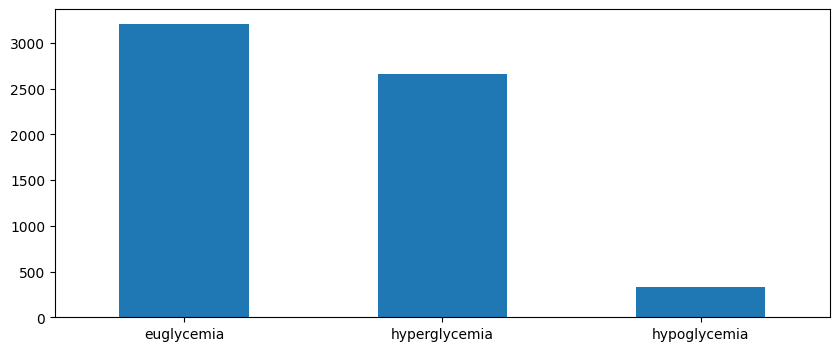

In [75]:
df_Yval_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [76]:
N=5
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

1240


In [77]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xval.shape[1],array_Xval.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 966
Program finished in 0.5590461000101641 seconds - using multiprocessing
1 1910
Program finished in 0.517785999996704 seconds - using multiprocessing
2 2895
Program finished in 0.45482020000054035 seconds - using multiprocessing
3 3859
Program finished in 0.49191850000352133 seconds - using multiprocessing
4 4857
Program finished in 0.4251684000046225 seconds - using multiprocessing


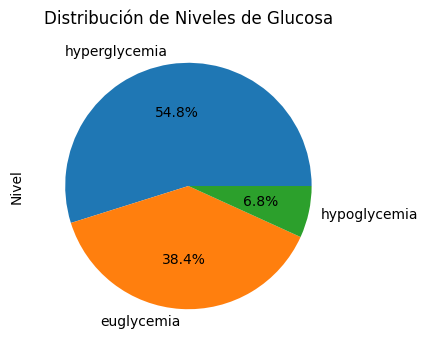

In [78]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [79]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    2664
euglycemia       1863
hypoglycemia      330
Name: Nivel, dtype: int64

In [80]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 755
Program finished in 0.20051819999935105 seconds - using multiprocessing
1 1538
Program finished in 0.20589310000650585 seconds - using multiprocessing
2 2272
Program finished in 0.21596410000347532 seconds - using multiprocessing
3 3031
Program finished in 0.20562639999843668 seconds - using multiprocessing
4 3768
Program finished in 0.2794438999990234 seconds - using multiprocessing


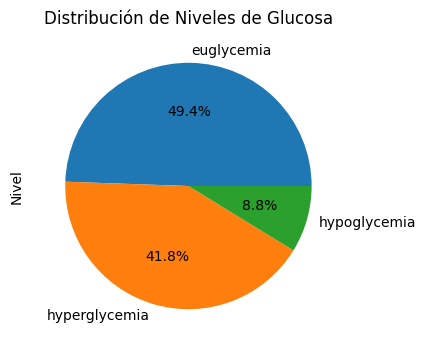

In [81]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [82]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       1863
hyperglycemia    1575
hypoglycemia      330
Name: Nivel, dtype: int64

<AxesSubplot: >

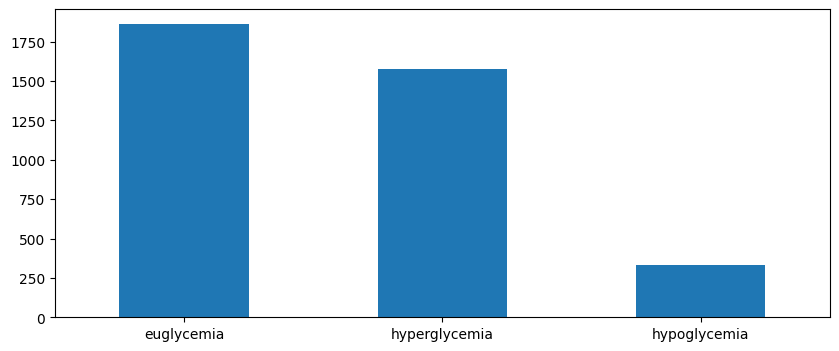

In [83]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [84]:
with open('dataset/generado/'+paciente+'/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [85]:
with open('dataset/generado/'+paciente+'/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [86]:
len(XNew)

3768

In [87]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 596
Program finished in 0.06102870000177063 seconds - using multiprocessing
1 1165
Program finished in 0.06801840000844095 seconds - using multiprocessing
2 1760
Program finished in 0.05474490000051446 seconds - using multiprocessing
3 2347
Program finished in 0.06568810000317171 seconds - using multiprocessing
4 2951
Program finished in 0.054490399998030625 seconds - using multiprocessing


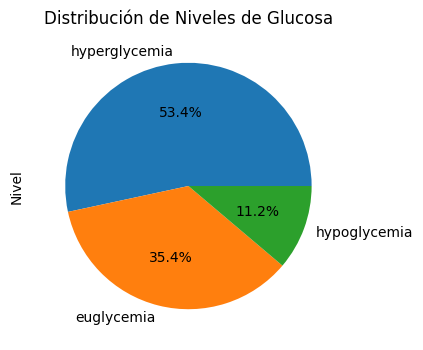

In [88]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [89]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    1575
euglycemia       1046
hypoglycemia      330
Name: Nivel, dtype: int64

In [90]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 468
Program finished in 0.03932939999504015 seconds - using multiprocessing
1 924
Program finished in 0.03347850000136532 seconds - using multiprocessing
2 1377
Program finished in 0.0384014000010211 seconds - using multiprocessing
3 1835
Program finished in 0.04484519999823533 seconds - using multiprocessing
4 2285
Program finished in 0.04581779999716673 seconds - using multiprocessing


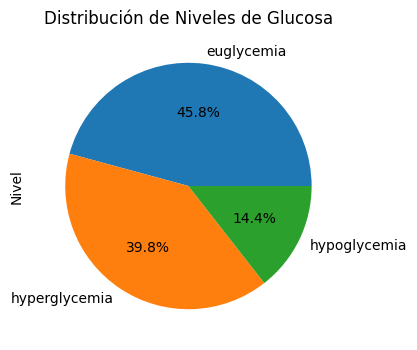

In [91]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [92]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       1046
hyperglycemia     909
hypoglycemia      330
Name: Nivel, dtype: int64

<AxesSubplot: >

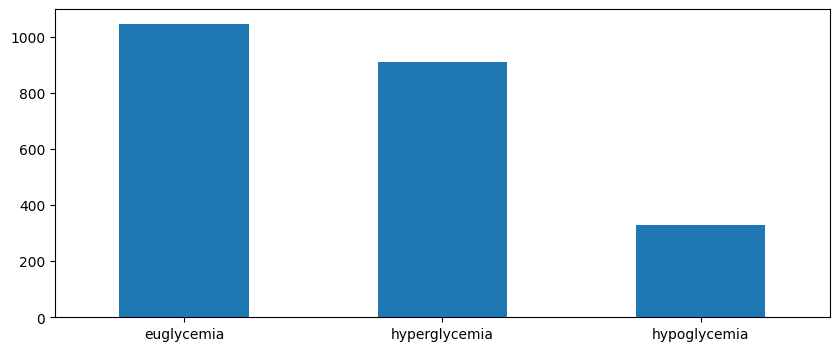

In [93]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [94]:
with open('dataset/generado/'+paciente+'/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [95]:
with open('dataset/generado/'+paciente+'/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [96]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 356
Program finished in 0.033959099993808195 seconds - using multiprocessing
1 699
Program finished in 0.03779599998961203 seconds - using multiprocessing
2 1062
Program finished in 0.034108799998648465 seconds - using multiprocessing
3 1430
Program finished in 0.0412746999936644 seconds - using multiprocessing
4 1816
Program finished in 0.026222500004223548 seconds - using multiprocessing


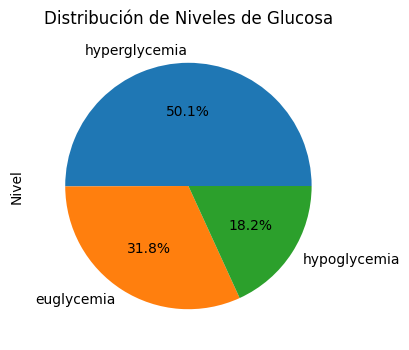

In [97]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [98]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    909
euglycemia       577
hypoglycemia     330
Name: Nivel, dtype: int64

In [99]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 287
Program finished in 0.0283039999922039 seconds - using multiprocessing
1 579
Program finished in 0.031116599988308735 seconds - using multiprocessing
2 864
Program finished in 0.03166659999988042 seconds - using multiprocessing
3 1156
Program finished in 0.021433399990200996 seconds - using multiprocessing
4 1431
Program finished in 0.026383200005511753 seconds - using multiprocessing


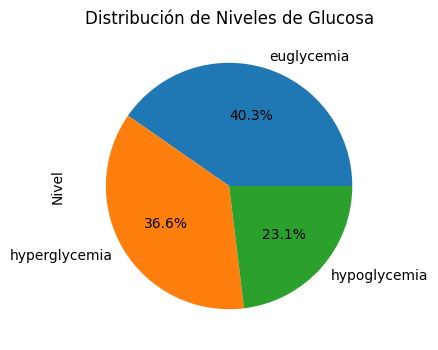

In [100]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [101]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       577
hyperglycemia    524
hypoglycemia     330
Name: Nivel, dtype: int64

<AxesSubplot: >

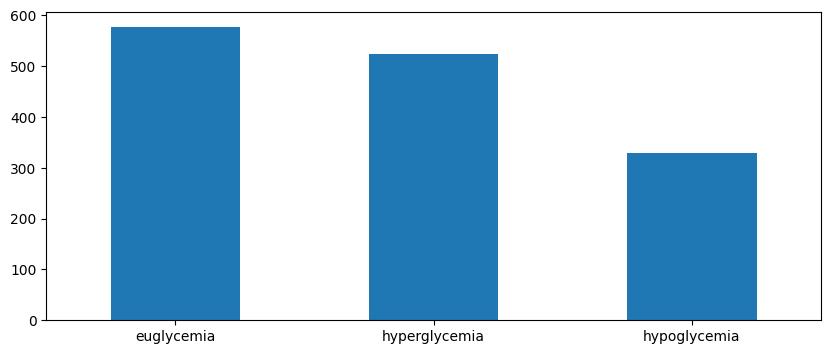

In [102]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [103]:
with open('dataset/generado/'+paciente+'/array_Xval_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [104]:
with open('dataset/generado/'+paciente+'/array_Yval_down3.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [105]:
with open('dataset/generado/'+paciente+'/array_Xval_down3.npy', 'rb') as f:
    array_Xval = np.load(f)

In [106]:
len(array_Xval)

1431

In [107]:
with open('dataset/generado/'+paciente+'/array_Yval_down3.npy', 'rb') as f:
    array_Yval = np.load(f)

In [108]:
len(array_Yval)

1431

In [109]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

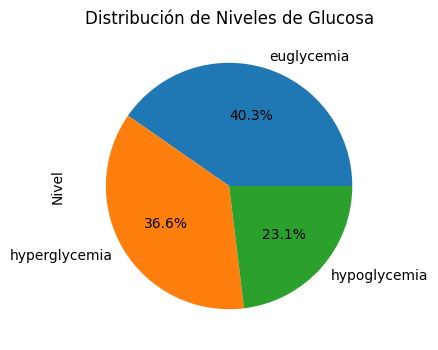

In [110]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [111]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       577
hyperglycemia    524
hypoglycemia     330
Name: Nivel, dtype: int64

In [112]:
minClass=df_Y_scaled['Nivel'].value_counts().min()
minClass

330

In [113]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',False,minClass) 

In [114]:
len(YnewLabel)

1237

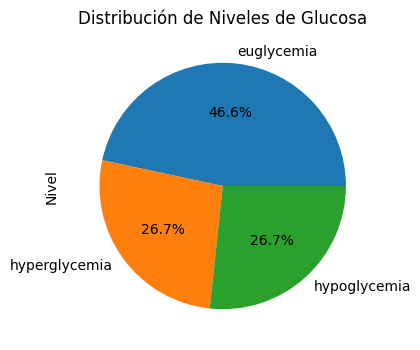

In [115]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [116]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       577
hyperglycemia    330
hypoglycemia     330
Name: Nivel, dtype: int64

In [117]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

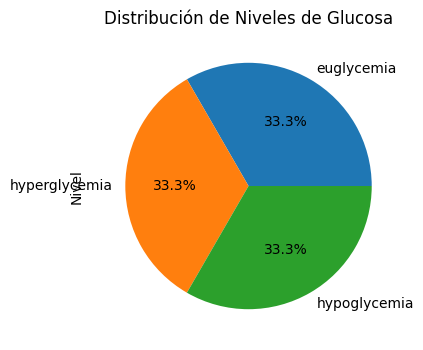

In [118]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [119]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       330
hyperglycemia    330
hypoglycemia     330
Name: Nivel, dtype: int64

<AxesSubplot: >

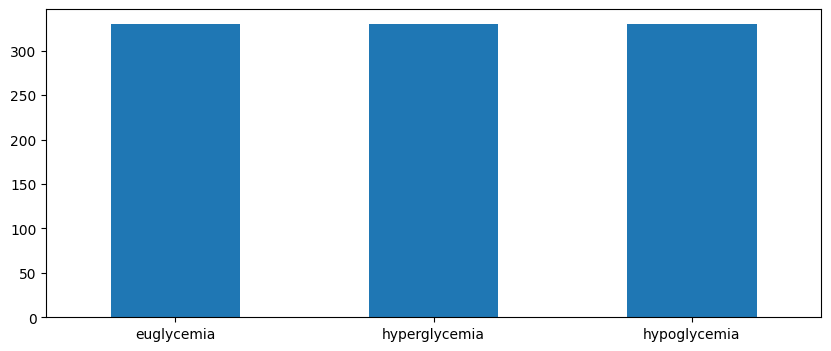

In [120]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [121]:
with open('dataset/generado/'+paciente+'/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [122]:
with open('dataset/generado/'+paciente+'/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)